In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

In [3]:
uber = pd.read_csv("C:/Users/naman/Documents/Python Scripts/Uber Assignment/Uber Request Data.csv")

In [4]:
uber["Request_timestamp"] = pd.to_datetime(uber["Request_timestamp"])
uber["Drop_timestamp"] = pd.to_datetime(uber["Drop_timestamp"])
uber['Trip_Time'] = (uber['Drop_timestamp'] - uber['Request_timestamp'])

In [5]:
uber.head(10)

,Request_id,Pickup_point,Driver id,Status,Request_timestamp,Drop_timestamp,Trip_Time
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,01:09:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,00:50:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,00:41:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,00:55:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,00:52:31
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,00:31:31
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,00:57:43
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,00:56:00
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,00:53:24
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00,00:39:00


In [6]:
#uber_time = uber['Request_timestamp'].dt.components
#uber = pd.concat([uber,uber_time],axis=1)
uber['Day'] = uber['Request_timestamp'].dt.day
uber['Hour'] = uber["Request_timestamp"].dt.hour
uber.head(4)

,Request_id,Pickup_point,Driver id,Status,Request_timestamp,Drop_timestamp,Trip_Time,Day,Hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,01:09:00,7,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,00:50:00,7,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,00:41:00,7,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,00:55:00,7,21


In [7]:
uber.Day.unique()

array([ 7, 13, 14, 15], dtype=int64)

In [8]:
uber.groupby((['Day','Status']), as_index=False)['Request_id'].count()

,Day,Status,Request_id
0,7,Cancelled,502
1,7,No Cars Available,1009
2,7,Trip Completed,1163
3,13,Cancelled,270
4,13,No Cars Available,490
5,13,Trip Completed,577
6,14,Cancelled,252
7,14,No Cars Available,571
8,14,Trip Completed,530
9,15,Cancelled,240


In [9]:
uber.rename(columns={'hours' : 'trip_hours','minutes':'trip_minutes','seconds':'trip_seconds'},inplace=True)
uber.head(10)

,Request_id,Pickup_point,Driver id,Status,Request_timestamp,Drop_timestamp,Trip_Time,Day,Hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,01:09:00,7,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,00:50:00,7,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,00:41:00,7,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,00:55:00,7,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,00:52:31,13,8
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,00:31:31,13,21
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,00:57:43,14,6
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,00:56:00,15,5
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,00:53:24,15,17
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00,00:39:00,7,6


In [10]:
uber.describe()

,Request_id,Driver id,Trip_Time,Day,Hour
count,6745.000000,4095.000000,2831,6745.000000,6745.000000
mean,3384.644922,149.501343,-1 days +13:14:01.893323,11.231431,12.956709
std,1955.099667,86.051994,10 days 07:07:51.550378,3.487899,6.504052
min,1.000000,1.000000,-148 days +00:33:55,7.000000,0.000000
25%,1691.000000,75.000000,0 days 00:41:00,7.000000,7.000000
50%,3387.000000,149.000000,0 days 00:52:05,13.000000,13.000000
75%,5080.000000,224.000000,0 days 01:04:00,14.000000,19.000000
max,6766.000000,300.000000,29 days 01:15:00,15.000000,23.000000


In [11]:
status_df = pd.DataFrame(uber["Status"].value_counts() )#, index = range(1,len(status_df)+1))
status_df = pd.DataFrame(status_df) #,columns=["Status" ,"Requests"])
status_df["d"] = status_df.index 
status_df.index = range(1,len(status_df)+1)
status_df.columns = ["Request#" , "Status"]
print(status_df)

   Request#             Status
1      2831     Trip Completed
2      2650  No Cars Available
3      1264          Cancelled


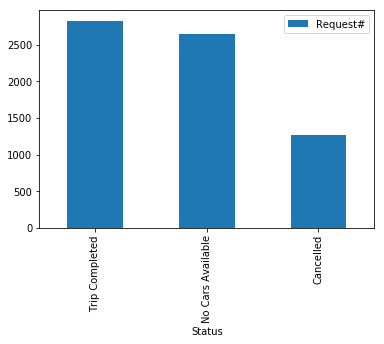

In [12]:
status_df.plot(x = status_df['Status'],kind='bar')

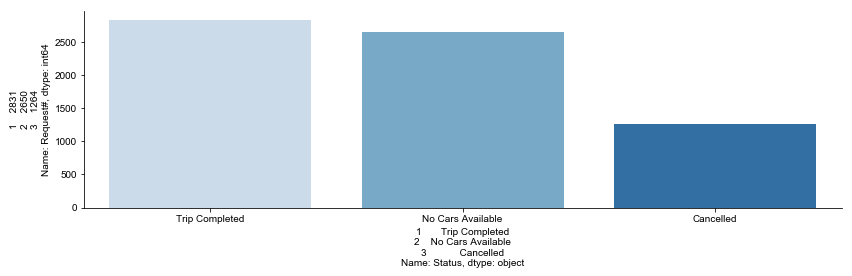

In [13]:
sns.factorplot(status_df["Status"],status_df["Request#"], data=status_df,kind="bar",palette="Blues",size=4,aspect=3,legend_out=False);
sns.set()

In [14]:
Spot_Status = uber.groupby((['Status','Pickup_point']), as_index=False)['Request_id'].count()
Spot_Status

,Status,Pickup_point,Request_id
0,Cancelled,Airport,198
1,Cancelled,City,1066
2,No Cars Available,Airport,1713
3,No Cars Available,City,937
4,Trip Completed,Airport,1327
5,Trip Completed,City,1504


In [15]:
uber.head()

,Request_id,Pickup_point,Driver id,Status,Request_timestamp,Drop_timestamp,Trip_Time,Day,Hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,01:09:00,7,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,00:50:00,7,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,00:41:00,7,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,00:55:00,7,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,00:52:31,13,8


In [16]:
uber['Session'] = pd.cut(uber['Hour'],[0,5,11,16,20,24],labels=['Late_Night','Morning','Afternoon','Evening','Night'])
uber.head(10)

,Request_id,Pickup_point,Driver id,Status,Request_timestamp,Drop_timestamp,Trip_Time,Day,Hour,Session
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,01:09:00,7,11,Morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,00:50:00,7,17,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,00:41:00,7,9,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,00:55:00,7,21,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,00:52:31,13,8,Morning
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,00:31:31,13,21,Night
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,00:57:43,14,6,Morning
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,00:56:00,15,5,Late_Night
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,00:53:24,15,17,Evening
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00,00:39:00,7,6,Morning


In [17]:
Status_group = uber.groupby((['Status','Session']),as_index=False)['Trip_Time'].count()
Status_group

,Status,Session,Trip_Time
0,Cancelled,Late_Night,0
1,Cancelled,Morning,0
2,Cancelled,Afternoon,0
3,Cancelled,Evening,0
4,Cancelled,Night,0
5,No Cars Available,Late_Night,0
6,No Cars Available,Morning,0
7,No Cars Available,Afternoon,0
8,No Cars Available,Evening,0
9,No Cars Available,Night,0


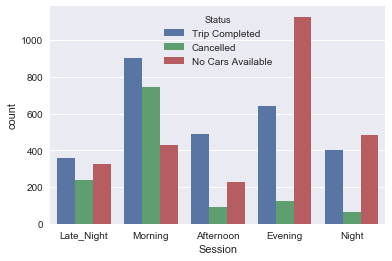

In [18]:
sns.countplot(x='Session',hue='Status',data=uber)
sns.set()
plt.show()

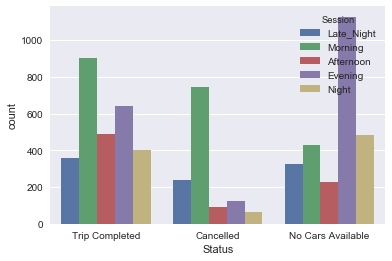

In [19]:
sns.countplot(x='Status',hue='Session',data=uber)
sns.set()
plt.show()

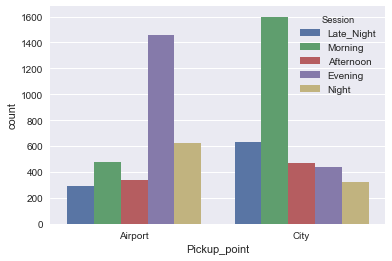

In [20]:
sns.countplot(x='Pickup_point',hue='Session',data=uber)
sns.set()
plt.show()

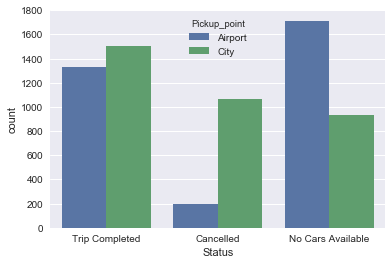

In [21]:
sns.countplot(x='Status',hue='Pickup_point',data=uber)
sns.set()
plt.show()

g = sns.FacetGrid(col='Status',row='Pickup_point',data=uber)
g = g.map(plt.scatter, "Request_id")
plt.plot()

[]

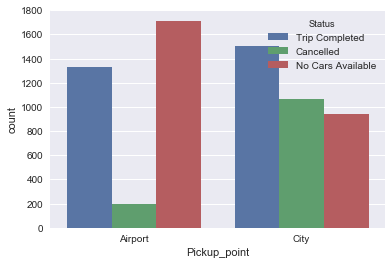

In [22]:
sns.countplot(x = 'Pickup_point',hue='Status',data=uber)
sns.set()
plt.plot()

[]

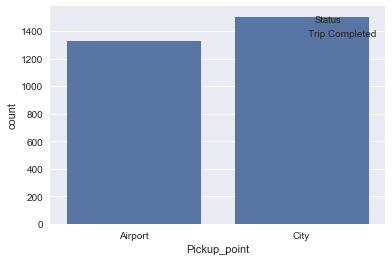

In [23]:
sns.countplot(x = 'Pickup_point',hue='Status',data=uber[uber['Status']=='Trip Completed'])
sns.set()
plt.plot()

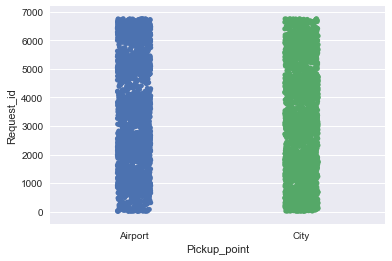

In [24]:
sns.stripplot(x='Pickup_point' , y='Request_id' , data=uber,jitter=True)
sns.set()

In [25]:
count = uber[['Request_id','Status','Hour']].groupby(['Hour','Status']).count()
count1 = count.unstack(level=1)
count1['Request_id'].head()

Status,Cancelled,No Cars Available,Trip Completed
Hour,,,
0,3,56,40
1,4,56,25
2,5,57,37
3,2,56,34
4,51,74,78


In [30]:
count1.head()
count1.columns

MultiIndex(levels=[['Request_id'], ['Cancelled', 'No Cars Available', 'Trip Completed']],
           labels=[[0, 0, 0], [0, 1, 2]],
           names=[None, 'Status'])

In [35]:
count1.columns

TypeError: 'MultiIndex' object is not callable

In [31]:
plt.plot(uber['Hour'].unique(),count1['Status']['Cancelled'],color='red',label='Cancelled')

KeyError: 'Status'

In [60]:
uber_session = pd.DataFrame(uber.groupby(['Pickup_point','Session'])["Request_id"].count()).reset_index()

In [62]:
uber_session

,Pickup_point,Session,Request_id
0,Airport,Late_Night,292
1,Airport,Morning,473
2,Airport,Afternoon,339
3,Airport,Evening,1457
4,Airport,Night,624
5,City,Late_Night,632
6,City,Morning,1599
7,City,Afternoon,471
8,City,Evening,436
9,City,Night,323


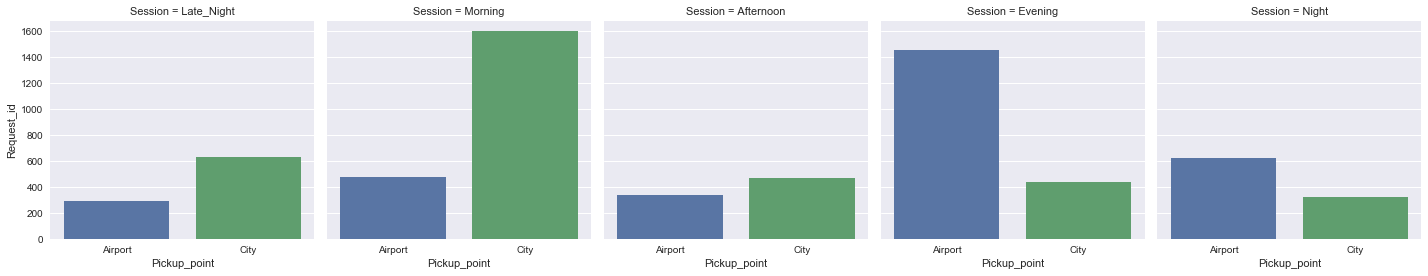

In [64]:
sns.factorplot(x='Pickup_point',y="Request_id",data=uber_session,col='Session',kind='bar')

In [65]:
uber[['Request_id','Pickup_point','Session']].head()

,Request_id,Pickup_point,Session
0,619,Airport,Morning
1,867,Airport,Evening
2,1807,City,Morning
3,2532,Airport,Night
4,3112,City,Morning


In [71]:
jk = pd.DataFrame(uber_session.loc(2,3))

TypeError: __call__() takes from 1 to 2 positional arguments but 3 were given

In [87]:
uber_session.loc[1:4]

,Pickup_point,Session,Request_id
1,Airport,Morning,473
2,Airport,Afternoon,339
3,Airport,Evening,1457
4,Airport,Night,624


In [90]:
uber_session.iloc[1:4]


,Pickup_point,Session,Request_id
1,Airport,Morning,473
2,Airport,Afternoon,339
3,Airport,Evening,1457
